# Estudando Natual Language Processing in Python

https://training-course-material.com/training/Natural_Language_Processing_in_Python

## Exercise

Write a program that generates random text using this algorithm. 
Hint: use random.choice to choose randomly one element from a list. 
New concepts introduced in this exercise:
- nltk.trigram
- tuples (pairs, unpacking)
- dictionaries (creating new key, in, accessing existing key, iterating)
- list.append
- generate the mapper
- defaultdict
- generate the mapper with defaultdict
- str.lower()
- list comprehension
- str.isalpha()
- show the stub of generate function and its usage
- write generate function

In [36]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [32]:
from nltk.corpus import gutenberg
from collections import defaultdict
from random import choice

words = (word.lower() for word in gutenberg.words() if word.isalpha())
trigrams = nltk.trigrams(words)

# cria um dicionário que receberá como valores uma lista
# caso a mesma chave seja achada, é adicionado na mesma chave mais um valor
# por isso é conveniente o uso da lista
mapper = defaultdict(list)

with open("trigrams.txt", 'w') as f:
    for a, b, c in trigrams:
        f.write(f"{a} {b} {c}\n")
        mapper[a, b].append(c)
        
def generate(word1, word2, N):
    sentence = [word1, word2]
    for i in range(N):
        new_word = choice(mapper[word1, word2])
        sentence.append(new_word)
        word1, word2 = word2, new_word
    return " ".join(sentence)
        

In [33]:
# word1, word2 = choice(mapper.keys())  # use for random results
word1, word2 = 'i', 'can'
generate(word1, word2, 30)

'i can put ye in the trenches ascending from the high road nothing will you come nearer to him zechariah jeiel and shemaiah and the arrow of deliverance from the least intention'

# Exercice

Write function find_language that takes a word and returns a list of language that this word may be in. Use udhr corpus. Narrow down your search scope to files in Latin1 encoding. Lookup words one and ein. New concepts introduced in this exercise:

- str.endswith
- and boolean operator


In [35]:
import nltk
nltk.download('udhr')

[nltk_data] Downloading package udhr to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\udhr.zip.


True

In [81]:
from nltk.corpus import udhr

def find_language(word):
    word = word.lower()
    
    return [
        language
        for language in udhr.fileids()
        if language.endswith('Latin1')
        and word in nltk.corpus.udhr.words(language)
    ]

In [82]:
print(find_language("one"))
print(find_language('ein'))

['English-Latin1', 'NigerianPidginEnglish-Latin1', 'Picard-Latin1']
['Faroese-Latin1', 'German_Deutsch-Latin1', 'Norwegian_Norsk-Nynorsk-Latin1']


---

# Exemplos de distribuição

62103
6.1448329497533285
[(',', 70509), ('the', 62103), (':', 43766), ('and', 38847), ('of', 34480), ('.', 26160), ('to', 13396), ('And', 12846), ('that', 12576), ('in', 12331)]


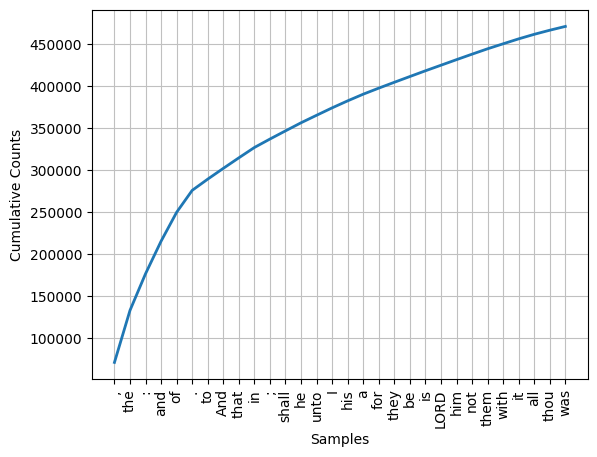

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [85]:
from nltk.corpus import gutenberg

%matplotlib inline

fd = nltk.FreqDist(gutenberg.words('bible-kjv.txt'))

# quantas vezes uma palavra aparece
print(fd['the'])

# porcentagem da palabra 'the'
print(fd.freq('the')*100)

# 10 palavras mais comuns
print(fd.most_common(10))

#gráfico com as contagem acumulativa as 30 palavras mais comuns
fd.plot(30, cumulative=True)

# Excercice

Find all words that occur at least ten times in brown corpus.

In [86]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [104]:
from nltk.corpus import brown

fd_brown = nltk.FreqDist(brown.words())

frequent_words = [word for word, frequency in fd_brown.items() if frequency >= 10 and word.isalpha()]

frequent_words[:20]

['The',
 'Fulton',
 'County',
 'Grand',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 'recent',
 'primary',
 'election',
 'produced',
 'no',
 'evidence',
 'that',
 'any',
 'took',
 'place',
 'jury']

# Exercice

How frequently do letters appear in English text? Use swadesh corpora.


In [105]:
nltk.download('swadesh')

[nltk_data] Downloading package swadesh to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\swadesh.zip.


True

In [106]:
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [109]:
text = swadesh.raw('en')

#filter pontuaction, spaces, etc
letters = [letter for letter in text.lower() if letter.isalpha()]

In [112]:
text

'I\nyou (singular), thou\nhe\nwe\nyou (plural)\nthey\nthis\nthat\nhere\nthere\nwho\nwhat\nwhere\nwhen\nhow\nnot\nall\nmany\nsome\nfew\nother\none\ntwo\nthree\nfour\nfive\nbig\nlong\nwide\nthick\nheavy\nsmall\nshort\nnarrow\nthin\nwoman\nman (adult male)\nman (human being)\nchild\nwife\nhusband\nmother\nfather\nanimal\nfish\nbird\ndog\nlouse\nsnake\nworm\ntree\nforest\nstick\nfruit\nseed\nleaf\nroot\nbark (from tree)\nflower\ngrass\nrope\nskin\nmeat\nblood\nbone\nfat (noun)\negg\nhorn\ntail\nfeather\nhair\nhead\near\neye\nnose\nmouth\ntooth\ntongue\nfingernail\nfoot\nleg\nknee\nhand\nwing\nbelly\nguts\nneck\nback\nbreast\nheart\nliver\ndrink\neat\nbite\nsuck\nspit\nvomit\nblow\nbreathe\nlaugh\nsee\nhear\nknow (a fact)\nthink\nsmell\nfear\nsleep\nlive\ndie\nkill\nfight\nhunt\nhit\ncut\nsplit\nstab\nscratch\ndig\nswim\nfly (verb)\nwalk\ncome\nlie\nsit\nstand\nturn\nfall\ngive\nhold\nsqueeze\nrub\nwash\nwipe\npull\npush\nthrow\ntie\nsew\ncount\nsay\nsing\nplay\nfloat\nflow\nfreeze\nswell\n

In [110]:
letters

['i',
 'y',
 'o',
 'u',
 's',
 'i',
 'n',
 'g',
 'u',
 'l',
 'a',
 'r',
 't',
 'h',
 'o',
 'u',
 'h',
 'e',
 'w',
 'e',
 'y',
 'o',
 'u',
 'p',
 'l',
 'u',
 'r',
 'a',
 'l',
 't',
 'h',
 'e',
 'y',
 't',
 'h',
 'i',
 's',
 't',
 'h',
 'a',
 't',
 'h',
 'e',
 'r',
 'e',
 't',
 'h',
 'e',
 'r',
 'e',
 'w',
 'h',
 'o',
 'w',
 'h',
 'a',
 't',
 'w',
 'h',
 'e',
 'r',
 'e',
 'w',
 'h',
 'e',
 'n',
 'h',
 'o',
 'w',
 'n',
 'o',
 't',
 'a',
 'l',
 'l',
 'm',
 'a',
 'n',
 'y',
 's',
 'o',
 'm',
 'e',
 'f',
 'e',
 'w',
 'o',
 't',
 'h',
 'e',
 'r',
 'o',
 'n',
 'e',
 't',
 'w',
 'o',
 't',
 'h',
 'r',
 'e',
 'e',
 'f',
 'o',
 'u',
 'r',
 'f',
 'i',
 'v',
 'e',
 'b',
 'i',
 'g',
 'l',
 'o',
 'n',
 'g',
 'w',
 'i',
 'd',
 'e',
 't',
 'h',
 'i',
 'c',
 'k',
 'h',
 'e',
 'a',
 'v',
 'y',
 's',
 'm',
 'a',
 'l',
 'l',
 's',
 'h',
 'o',
 'r',
 't',
 'n',
 'a',
 'r',
 'r',
 'o',
 'w',
 't',
 'h',
 'i',
 'n',
 'w',
 'o',
 'm',
 'a',
 'n',
 'm',
 'a',
 'n',
 'a',
 'd',
 'u',
 'l',
 't',
 'm',
 'a',
 'l'

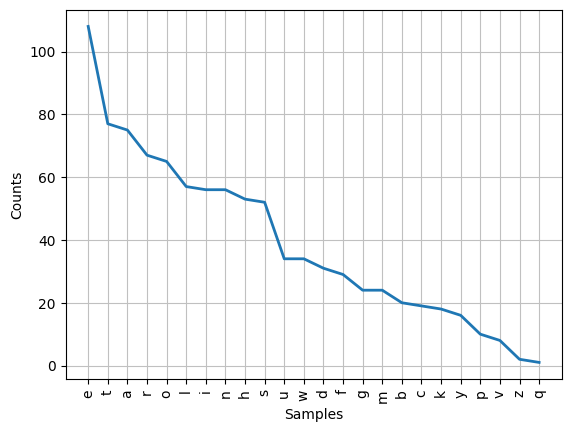

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [111]:
%matplotlib inline
fd = nltk.FreqDist(letters)
fd.plot()